## Importation class KMeans

In [30]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from KMeansAMoi import KMeans

In [31]:
iris = load_iris()
X = iris.data
y = iris.target

In [32]:
kmeans = KMeans(k=3)
kmeans.fit(X)
labels = kmeans.predict(X)

Le modèle est lancé avec K = 3 car c'est le nombre de cluster du dataset de base

In [33]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

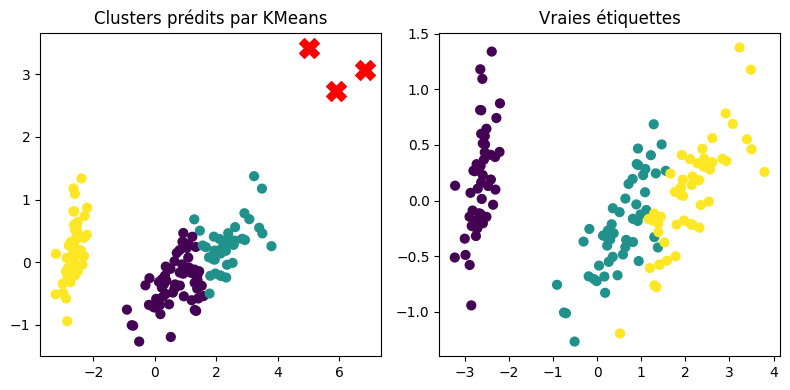

In [34]:
plt.figure(figsize=(8, 4))

# Clusters trouvés par KMeans
plt.subplot(1, 2, 1)
plt.title("Clusters prédits par KMeans")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=40)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], marker='X', c='red', s=200)

# Vraies classes
plt.subplot(1, 2, 2)
plt.title("Vraies étiquettes")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=40)

plt.tight_layout()
plt.show()

## Importation KMeans Scikit-Learn

In [35]:
from sklearn.cluster import KMeans

In [36]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

c:\Users\aubru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


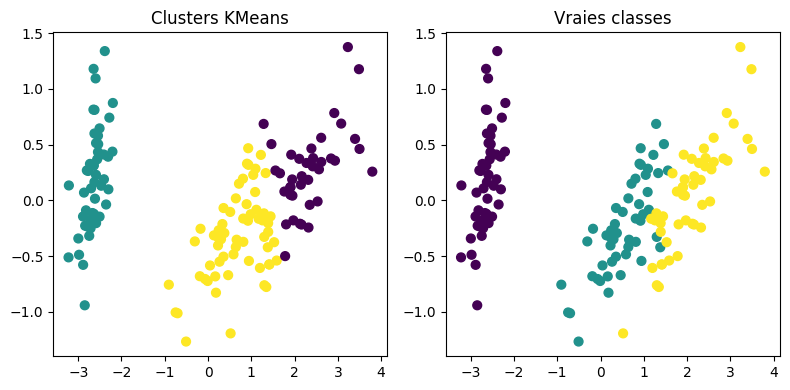

In [37]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title("Clusters KMeans")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=40)

plt.subplot(1, 2, 2)
plt.title("Vraies classes")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=40)

plt.tight_layout()
plt.show()

Test avec different nombre de cluster

In [38]:
kmeans2 = KMeans(n_clusters=2, random_state=42)
kmeans2.fit(X)
labels2 = kmeans2.labels_
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

c:\Users\aubru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


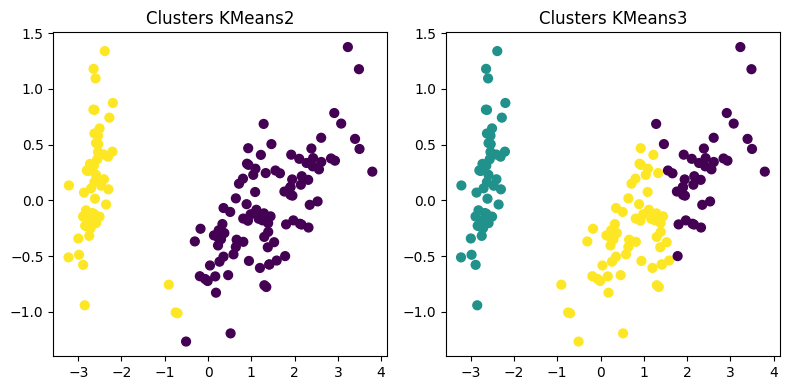

In [46]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title("Clusters KMeans2")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels2, cmap='viridis', s=40)

plt.subplot(1, 2, 2)
plt.title("Clusters KMeans3")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=40)

plt.tight_layout()
plt.show()

In [40]:
kmeans4 = KMeans(n_clusters=4, random_state=42)
kmeans4.fit(X)
labels4 = kmeans4.labels_
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

c:\Users\aubru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [42]:
kmeans5 = KMeans(n_clusters=5, random_state=42)
kmeans5.fit(X)
labels5 = kmeans5.labels_
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

c:\Users\aubru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


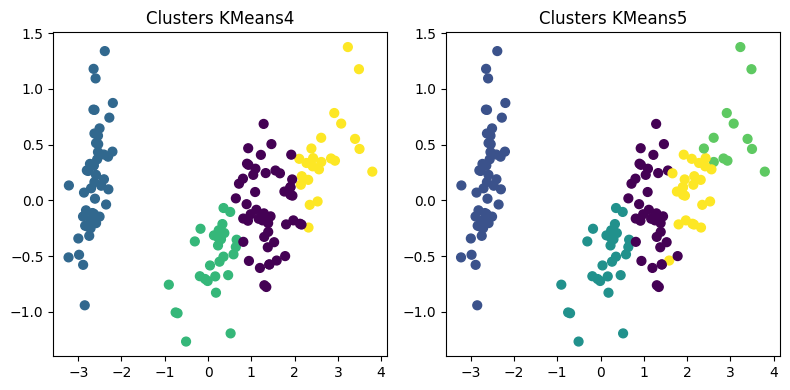

In [45]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title("Clusters KMeans4")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels4, cmap='viridis', s=40)

plt.subplot(1, 2, 2)
plt.title("Clusters KMeans5")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels5, cmap='viridis', s=40)



plt.tight_layout()
plt.show()

Les données étiquetées utilise 3 clusters, c'est donc le nombre de cluster optimal. On voit cependant qu'avec différents cluster, le modèle continue de distribuer les données équitablement